In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
digits_dataset = datasets.load_digits()
X = digits_dataset.data
y = digits_dataset.target
target_names1 = digits_dataset.target_names
df = pd.DataFrame(X)
df['labels'] = y
df=df[df.labels.isin([0,1,2,3])]
X=df.iloc[:,0:64].values
y=df.iloc[:,64].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=3)
X_r = lda.fit(X_train, y_train).transform(X_train)
X_r

array([[-2.26278252, -2.83179641,  3.03870624],
       [-1.87929382, -2.00979534,  3.08900584],
       [ 7.27637306,  0.78015229,  0.1018295 ],
       ...,
       [-2.08076931,  3.32102948, -0.72749505],
       [-2.73772385, -3.06736237,  1.40930396],
       [ 9.5487958 , -0.21651098, -1.20414293]])

In [4]:
#
lda.explained_variance_ratio_

array([0.56741416, 0.23723103, 0.1953548 ])

In [25]:
df2 = pd.DataFrame(X_r)
df2=pd.DataFrame(X_r[:, 0:3], columns = ['X_r1', 'X_r2','X_r3'])
df2['labels'] = y_train
df2

,X_r1,X_r2,X_r3,labels
0,7.586127,-0.387559,-0.615438,0
1,-2.870065,-1.329122,3.606345,1
2,-1.228690,-2.992650,1.409683,1
3,-1.218854,-3.553308,-2.232928,2
4,-2.599138,-3.554724,-2.232732,2
...,...,...,...,...
535,-2.300231,-1.062390,-3.777502,2
536,-1.839900,-1.342306,-2.885627,2
537,-2.215319,2.410369,-1.796827,3
538,-4.299688,-4.524824,-3.477404,2


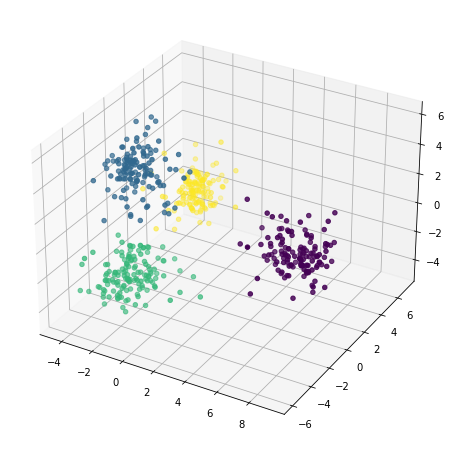

In [27]:
import matplotlib.pyplot as plt
import random
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df2.X_r1,df2.X_r2 ,df2.X_r3, c=df2.labels)
plt.show()

In [59]:
x_test_r = lda.transform(X_test)
x_test_r

array([[-2.02324237,  2.87838972,  1.23980563],
       [-2.88377028,  4.82295832, -1.0542975 ],
       [ 5.54310717,  1.51011161,  0.96966357],
       [ 3.45470114, -1.67190622,  3.40544282],
       [-2.39476891, -2.13929907, -2.46292142],
       [ 9.14925265,  0.1889455 ,  0.56829181],
       [-3.24117258, -2.44860915, -2.82331684],
       [-3.66361259, -4.484866  , -2.56304223],
       [-2.19921736,  6.94816118, -1.65059022],
       [-2.46524832, -1.28299163,  2.90190974],
       [ 6.99032751, -1.13245164,  0.82142757],
       [-2.99295296, -1.01790653,  4.99958812],
       [ 6.48994835,  0.66277625, -1.05270211],
       [ 6.69740954, -0.86311137, -0.23650807],
       [-2.11337378,  4.99242175,  1.86856699],
       [ 8.41776747,  0.20278823, -1.09791994],
       [-2.2131828 ,  4.88865899,  0.76759634],
       [ 5.09895672, -1.29937384,  0.55694441],
       [-2.92171491, -3.69357501, -5.42520672],
       [-3.38316162,  5.90893213,  1.01419334],
       [-1.90408364,  3.90985112,  1.001

In [60]:
# Predict
y_pred = lda.predict(X_test)
y_pred

array([3, 3, 0, 0, 2, 0, 2, 2, 3, 1, 0, 1, 0, 0, 3, 0, 3, 0, 2, 3, 3, 0,
       0, 2, 3, 1, 2, 1, 0, 3, 2, 3, 0, 3, 3, 0, 2, 1, 3, 0, 2, 1, 0, 3,
       2, 3, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 3, 2, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 2, 3, 0, 3, 2, 3, 0, 1, 2, 1, 1, 2, 3, 0, 1, 2, 2, 3, 3, 3, 2,
       1, 1, 0, 3, 0, 3, 2, 0, 1, 1, 2, 0, 0, 1, 2, 3, 3, 3, 3, 1, 3, 0,
       0, 1, 2, 0, 0, 1, 2, 1, 3, 0, 2, 1, 1, 2, 0, 1, 0, 1, 3, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 2, 1, 0, 3, 1, 1, 1, 0,
       0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 0, 3, 3, 1, 3, 2, 2, 2, 3, 0, 2, 0,
       3, 1, 0, 1])

In [66]:
# Accurancy
(y_test == y_pred).sum()/y_test.shape[0]

0.9944444444444445

In [73]:
y_pred

array([3, 3, 0, 0, 2, 0, 2, 2, 3, 1, 0, 1, 0, 0, 3, 0, 3, 0, 2, 3, 3, 0,
       0, 2, 3, 1, 2, 1, 0, 3, 2, 3, 0, 3, 3, 0, 2, 1, 3, 0, 2, 1, 0, 3,
       2, 3, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 3, 2, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 2, 3, 0, 3, 2, 3, 0, 1, 2, 1, 1, 2, 3, 0, 1, 2, 2, 3, 3, 3, 2,
       1, 1, 0, 3, 0, 3, 2, 0, 1, 1, 2, 0, 0, 1, 2, 3, 3, 3, 3, 1, 3, 0,
       0, 1, 2, 0, 0, 1, 2, 1, 3, 0, 2, 1, 1, 2, 0, 1, 0, 1, 3, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 2, 1, 0, 3, 1, 1, 1, 0,
       0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 0, 3, 3, 1, 3, 2, 2, 2, 3, 0, 2, 0,
       3, 1, 0, 1])

In [37]:
cumsum = np.cumsum(lda.explained_variance_ratio_)
cumsum

array([0.56741416, 0.8046452 , 1.        ])

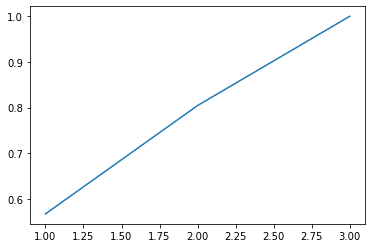

In [38]:
plt.plot(np.arange(1, len(lda.explained_variance_ratio_) + 1, 1) , cumsum)

In [46]:
#PCA
# PCA 
pca = PCA(n_components= 3)
X_r2 = pca.fit(X).transform(X_train)
X_r2

array([[-17.12594509,  16.88533933,   4.07132535],
       [ -9.95023217,  20.75668652,   3.7419246 ],
       [ 25.6417726 ,  -9.17749307,  -8.78725356],
       ...,
       [  3.01417277, -14.80608932,  13.30904275],
       [-17.98773347,   9.58235897, -10.94021715],
       [ 29.67042961,  -2.84134207,  -9.61934792]])

In [70]:
pca.explained_variance_ratio_

array([0.24860862, 0.14882361, 0.14735294])

In [57]:
df3 = pd.DataFrame(X_r2)
df3=pd.DataFrame(X_r2[:, 0:3], columns = ['X_pca1', 'X_pca2','X_pca3'])
df3['labels'] = y_train
df3

,X_pca1,X_pca2,X_pca3,labels
0,-17.125945,16.885339,4.071325,1
1,-9.950232,20.756687,3.741925,1
2,25.641773,-9.177493,-8.787254,0
3,22.391046,3.283585,-9.675170,0
4,-0.411779,-13.748708,17.989306,3
...,...,...,...,...
535,-5.947689,-9.843459,9.550973,3
536,8.799009,-24.239689,4.727432,3
537,3.014173,-14.806089,13.309043,3
538,-17.987733,9.582359,-10.940217,1


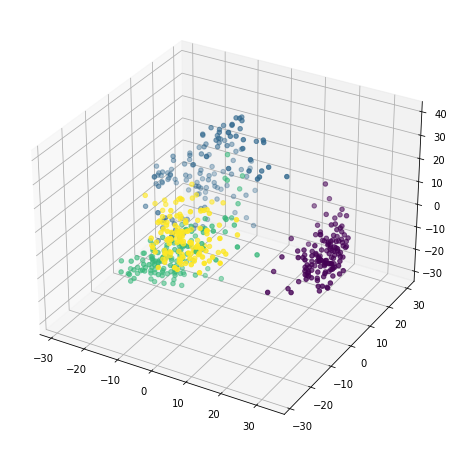

In [58]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df3.X_pca1,df3.X_pca2 ,df3.X_pca3, c=df3.labels)
plt.show()

In [68]:
x_test_r2 = pca.transform(X_test)
x_test_r2

array([[-9.69860653e+00, -1.25359347e+01,  9.31728183e+00],
       [-2.69805227e+00, -1.90421352e+01,  1.16467928e+01],
       [ 1.96137766e+01,  5.29474205e+00,  9.16423108e-01],
       [ 1.13457500e+01,  2.50732873e+01,  2.83714695e+00],
       [-1.65246163e+01, -1.95920031e+00, -2.37200953e+01],
       [ 3.23824686e+01,  2.93760069e+00, -6.04552181e+00],
       [-1.85085814e+01, -7.03959064e+00, -1.29220620e+01],
       [-7.68581484e+00,  1.56777945e+01,  4.86859784e+00],
       [ 1.21606599e+00, -2.33344394e+01,  1.33357488e+01],
       [-1.42236505e+01,  2.12461840e+01, -1.79329246e+00],
       [ 2.02230566e+01,  9.73881896e+00, -8.32116117e+00],
       [-6.99774261e+00,  1.41193486e+01,  2.94546086e+01],
       [ 2.15418827e+01,  3.37721072e+00, -1.29266370e+01],
       [ 2.48894808e+01,  1.35485232e+00, -1.04745861e+00],
       [-3.26146209e-01, -2.16408086e+01,  6.63218992e+00],
       [ 2.92206279e+01, -2.40240947e+00, -7.82164488e+00],
       [-4.09350324e+00, -1.84640711e+01

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred2=knn.predict(X_test)
y_pred2

array([3, 3, 0, 0, 2, 0, 2, 2, 3, 1, 0, 1, 0, 0, 3, 0, 3, 0, 2, 3, 3, 0,
       0, 2, 3, 1, 2, 1, 0, 3, 2, 3, 0, 3, 3, 0, 2, 1, 3, 0, 2, 1, 0, 3,
       2, 3, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 3, 2, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 2, 3, 0, 3, 2, 3, 0, 1, 2, 1, 3, 2, 3, 0, 1, 2, 2, 3, 3, 3, 2,
       1, 1, 0, 3, 0, 3, 2, 0, 1, 1, 2, 0, 0, 1, 2, 3, 3, 3, 3, 1, 3, 0,
       0, 1, 2, 0, 0, 1, 2, 1, 3, 0, 2, 1, 1, 2, 0, 1, 0, 1, 3, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 2, 1, 0, 3, 1, 1, 1, 0,
       0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 0, 3, 3, 1, 3, 2, 2, 2, 3, 0, 2, 0,
       3, 1, 0, 1])

In [97]:
accuracy_score(y_test, y_pred2)

1.0

In [98]:
accuracy_score(y_test, y_pred)

0.9944444444444445